# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Read the Dataset

In [42]:
df = pd.read_csv('DatesDataset.csv')

# EDA

In [43]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428.0,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014.0,0.7795,19.0000,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876.0,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255.0,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797.0,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [44]:
df.shape

(898, 35)

In [45]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AREA,898.0,NaN,NaN,NaN,298295.207127,107245.205337,1987.0,206948.0,319833.0,382573.0,546063.0
PERIMETER,898.0,NaN,NaN,NaN,2057.660953,410.012459,911.828,1726.0915,2196.34545,2389.716575,2811.9971
MAJOR_AXIS,898.0,NaN,NaN,NaN,750.811994,144.059326,336.7227,641.06865,791.3634,858.63375,1222.723
MINOR_AXIS,898.0,NaN,NaN,NaN,495.872785,114.268917,2.2832,404.684375,495.05485,589.0317,766.4536
ECCENTRICITY,873.0,NaN,NaN,NaN,1.354594,2.685857,0.3448,0.6892,0.759,0.8098,13.0
EQDIASQ,898.0,NaN,NaN,NaN,604.577938,119.593888,50.2984,513.317075,638.14095,697.930525,833.8279
SOLIDITY,898.0,NaN,NaN,NaN,0.98184,0.018157,0.8366,0.978825,0.9873,0.9918,0.9974
CONVEX_AREA,875.0,NaN,NaN,NaN,289413.179429,125328.341202,12.0,180998.5,319728.0,387707.5,552598.0
EXTENT,898.0,NaN,NaN,NaN,0.736267,0.053745,0.5123,0.705875,0.74695,0.77585,0.8562
ASPECT_RATIO,873.0,NaN,NaN,NaN,3.028896,18.444621,1.0793,1.3835,1.5379,1.7051,535.5257


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   873 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    875 non-null    float64
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   873 non-null    float64
 10  ROUNDNESS      874 non-null    float64
 11  COMPACTNESS    873 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [47]:
df['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

Missing data:  

In [48]:
df.isna().sum()

AREA              0
PERIMETER         0
MAJOR_AXIS        0
MINOR_AXIS        0
ECCENTRICITY     25
EQDIASQ           0
SOLIDITY          0
CONVEX_AREA      23
EXTENT            0
ASPECT_RATIO     25
ROUNDNESS        24
COMPACTNESS      25
SHAPEFACTOR_1     0
SHAPEFACTOR_2     0
SHAPEFACTOR_3     0
SHAPEFACTOR_4     0
MeanRR            0
MeanRG            0
MeanRB            0
StdDevRR          0
StdDevRG          0
StdDevRB          0
SkewRR            0
SkewRG            0
SkewRB            0
KurtosisRR        0
KurtosisRG        0
KurtosisRB        0
EntropyRR         0
EntropyRG         0
EntropyRB         0
ALLdaub4RR        0
ALLdaub4RG        0
ALLdaub4RB        0
Class             0
dtype: int64

In [49]:
columns_with_missing = ['ECCENTRICITY', 'CONVEX_AREA', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS']

for column in columns_with_missing:
    class_means = df.groupby('Class')[column].mean()
    df[column] = df.apply(
        lambda row: class_means[row['Class']] if pd.isnull(row[column]) else row[column],
        axis=1
    )


In [50]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

Data Visulization

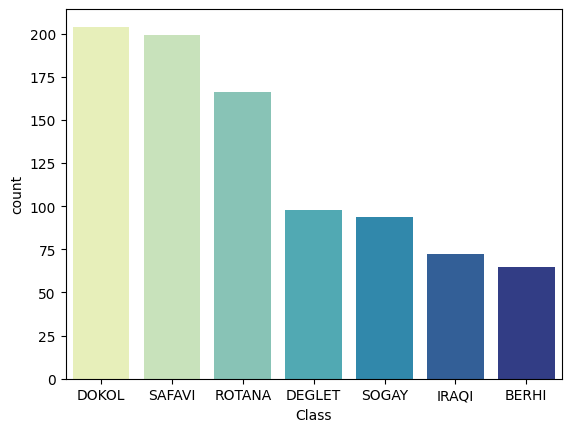

In [51]:
class_counts = df['Class'].value_counts()
sorted_classes = class_counts.index
sns.countplot(data=df, x='Class', palette='YlGnBu', order=sorted_classes)
plt.show()

# Outliers 

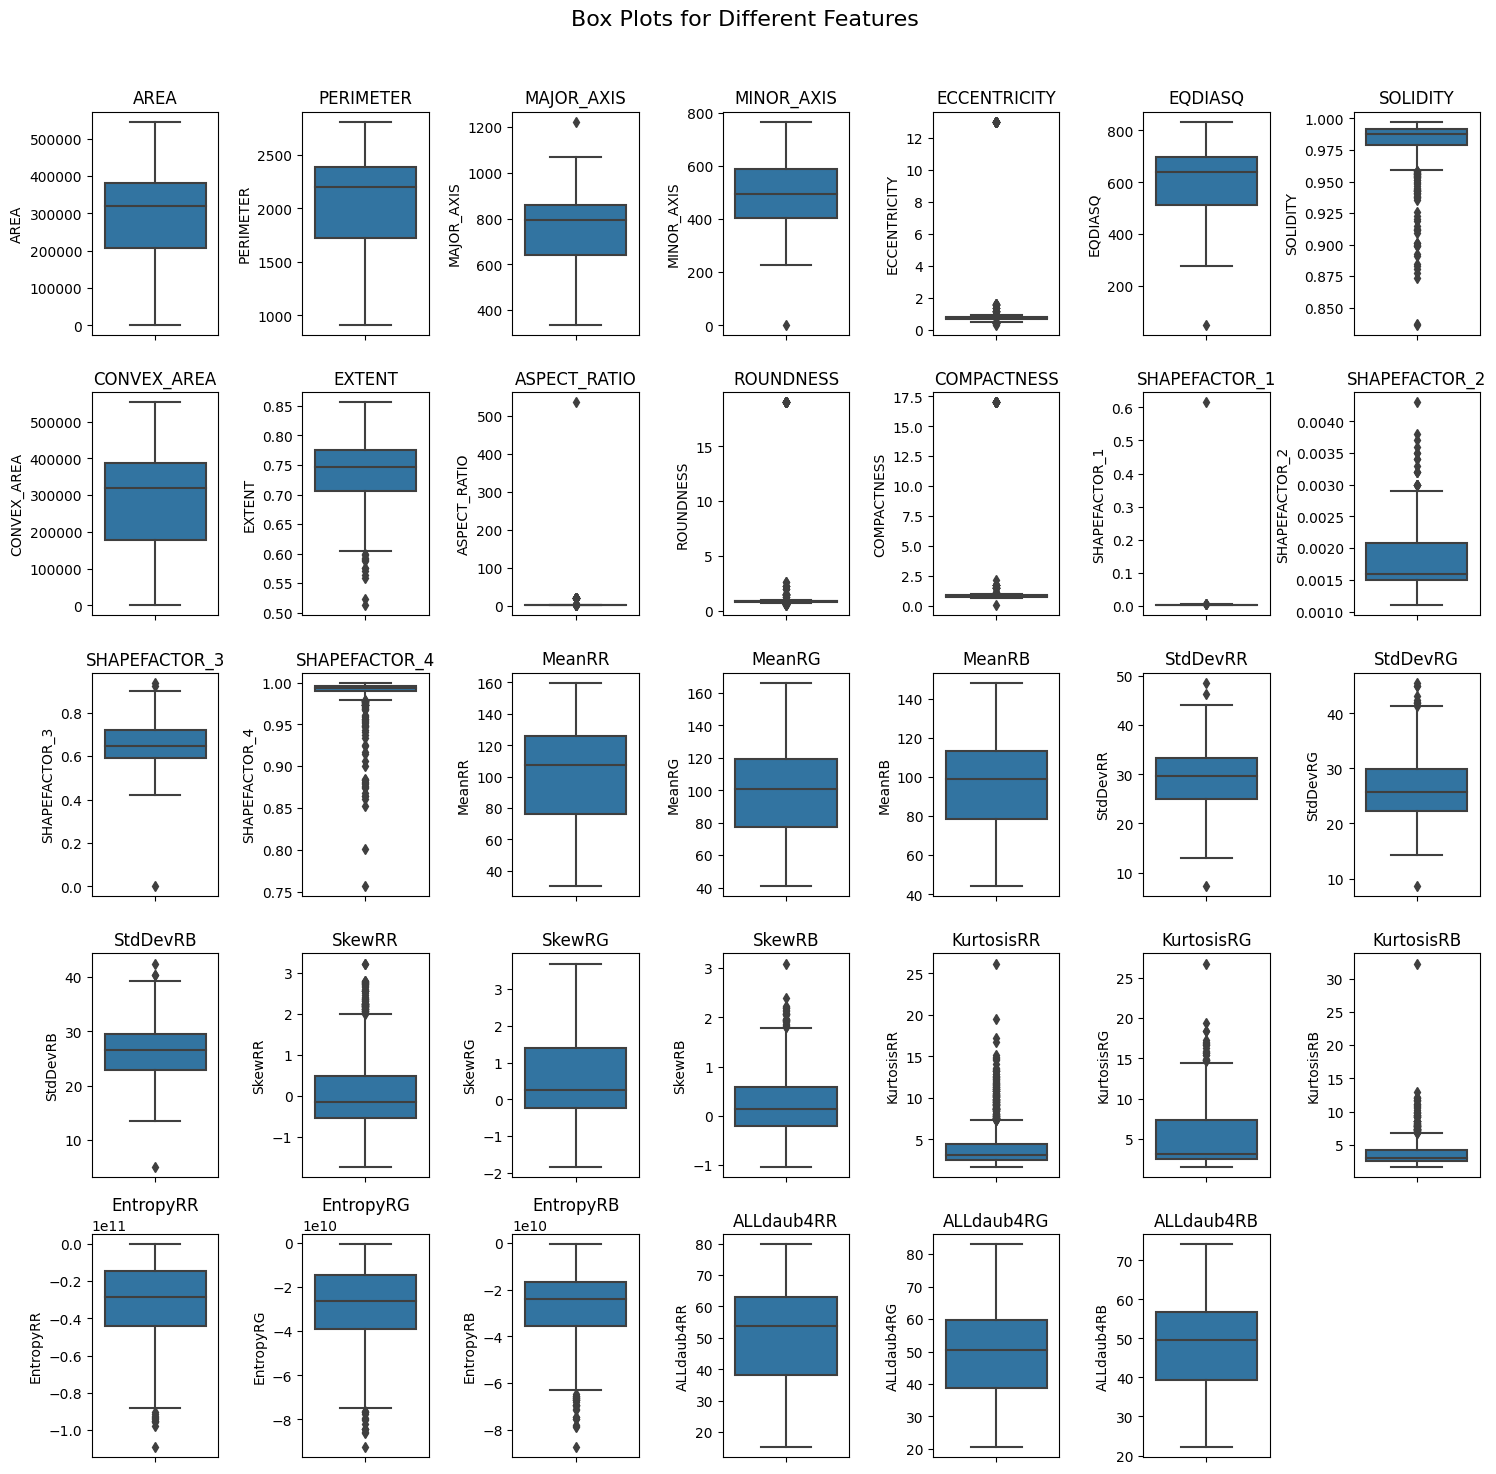

In [52]:
columns_to_plot = df.columns[:-1]

num_rows = 5
num_cols = 7
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle('Box Plots for Different Features', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(column)

for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

# Remove Outliers

In [53]:
def remove_outliers(df, columns, factor=1.5):
    df_copy = df.copy()
    for column in columns:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]
        df_copy = df_copy.drop(outliers.index)
    return df_copy

In [54]:
columns_with_outliers = ['ECCENTRICITY', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS','SHAPEFACTOR_1']

df = remove_outliers(df, columns_with_outliers, factor=1.5)


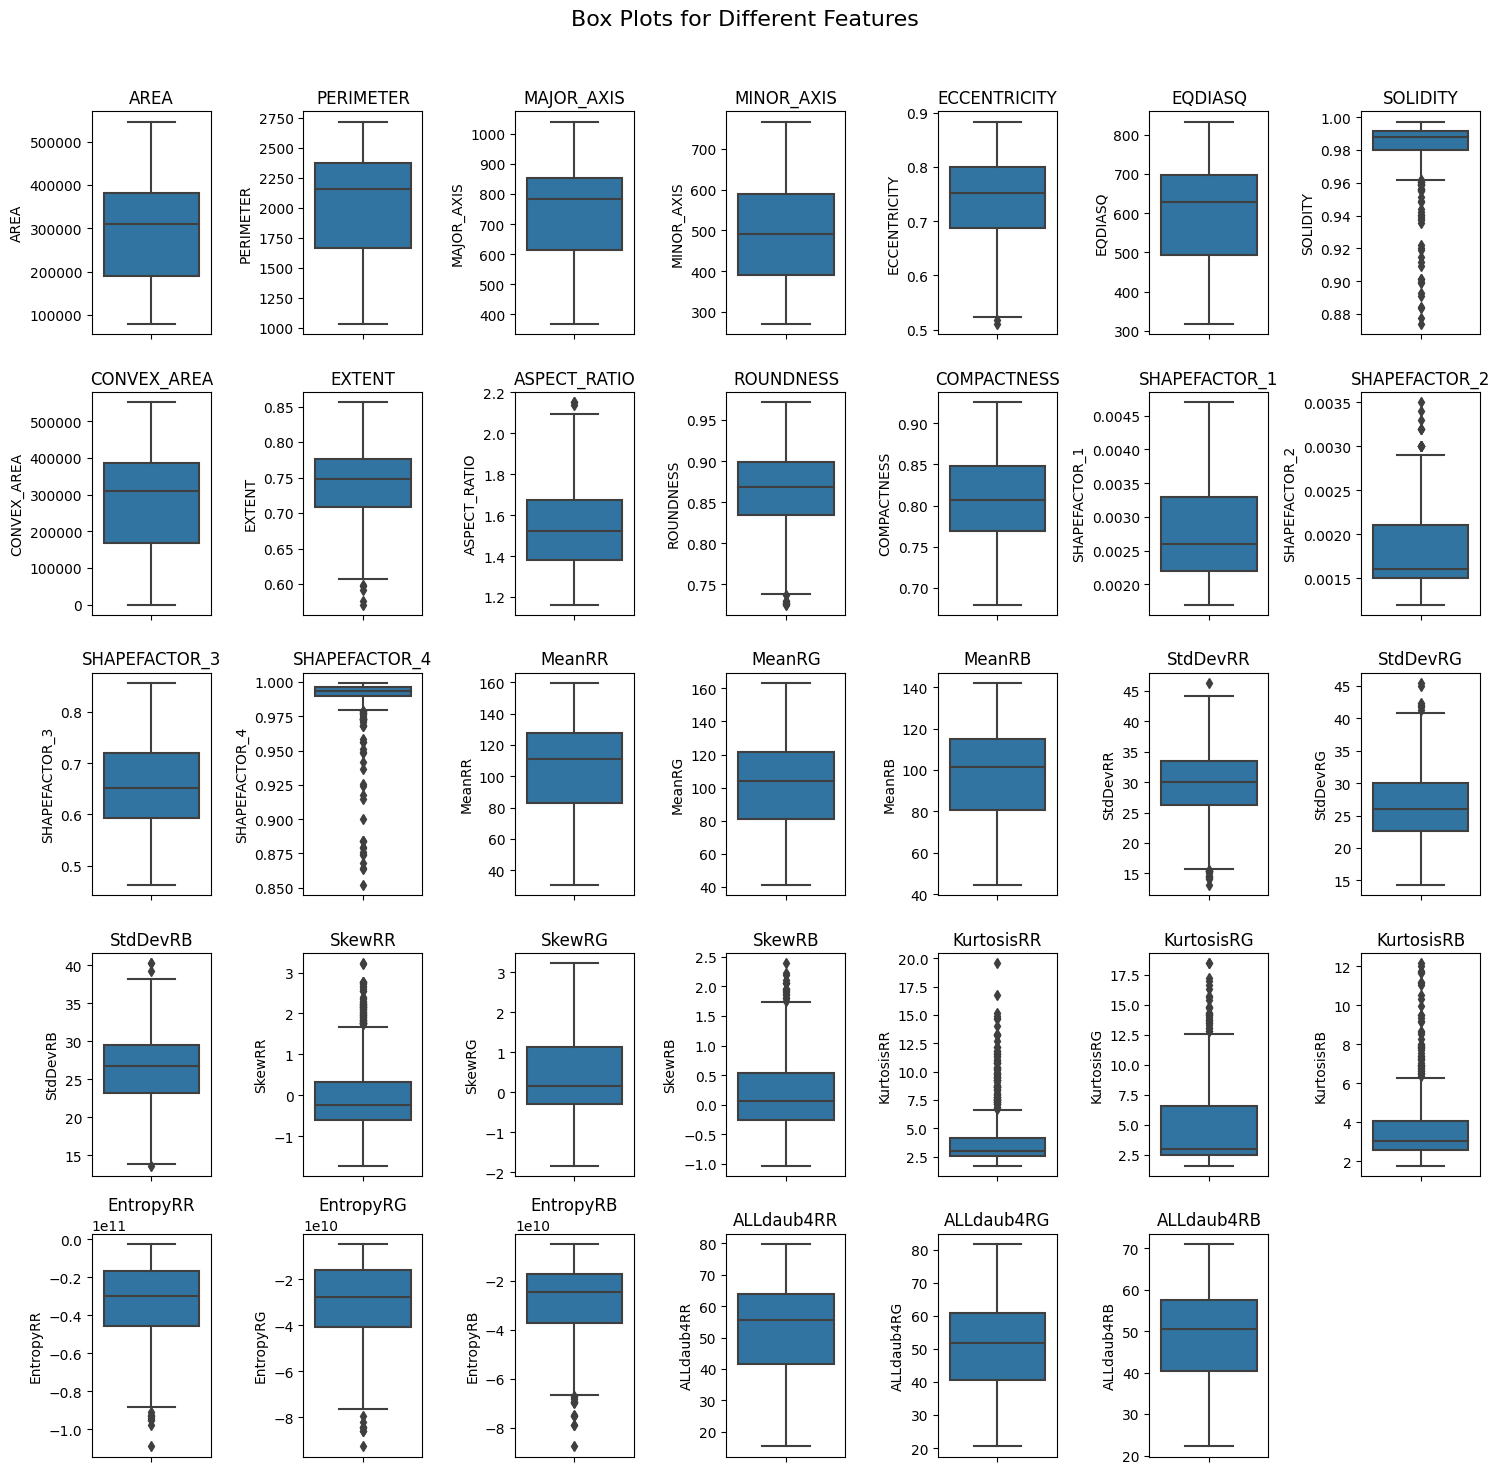

In [55]:
columns_to_plot = df.columns[:-1]
num_rows = 5
num_cols = 7
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle('Box Plots for Different Features', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(column)

for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [56]:
X = df.loc[:,df.columns != 'Class']
y = df.loc[:,df.columns  == 'Class']

# Feature Engineering 

In [57]:
scalerN = MinMaxScaler().fit(X)
scaled_dataN = scalerN.transform(X)
scaled_dfN = pd.DataFrame(scaled_dataN, columns=X.columns)


In [58]:
# Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

c:\Users\heshamsadan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


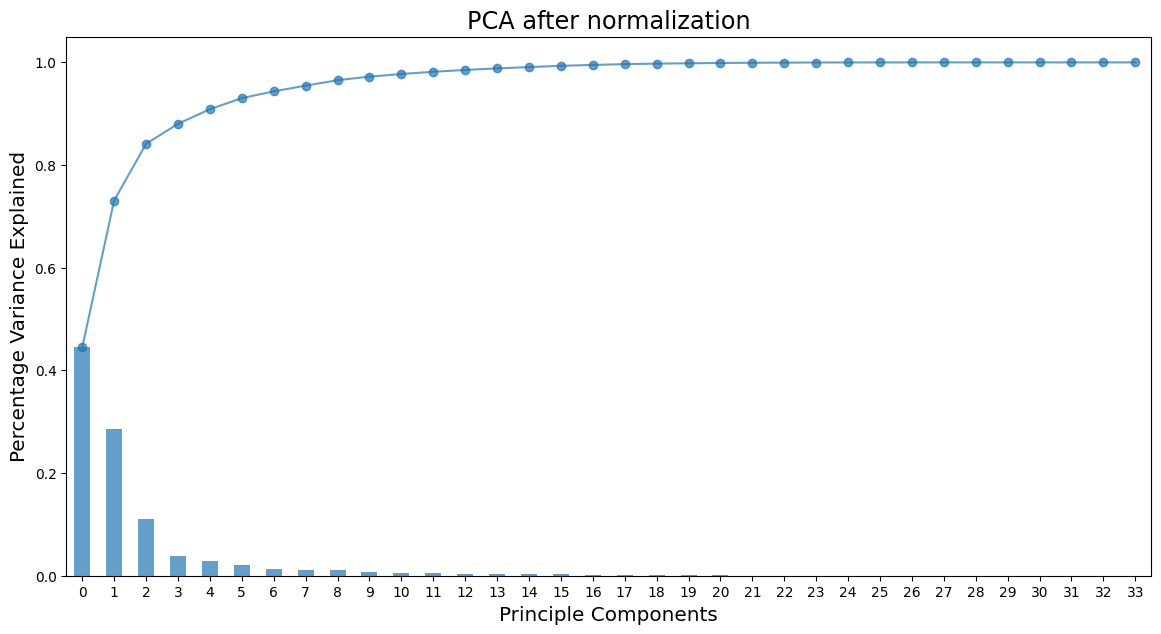

In [59]:
pca = PCA()
pca.fit(scaled_dfN)
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("PCA after normalization", fontsize="xx-large")
plt.show();

In [60]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428.0,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876.0,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255.0,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797.0,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036.0,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,346353,2324.4900,840.6997,527.3477,0.7788,664.0710,0.9758,354954.0,0.6792,1.5942,...,2.4594,2.3749,3.1157,-32985747456,-23318945792,-21721085952,47.5775,40.4490,40.0897,SOGAY
891,283636,2036.3490,751.8530,482.4856,0.7669,600.9464,0.9819,288870.0,0.7005,1.5583,...,2.1874,2.0473,2.8280,-26821468160,-23290361856,-16920019968,46.8981,44.2381,38.6353,SOGAY
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028.0,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255.0,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY


In [61]:
scalerS = StandardScaler().fit(X)
standarizes_data = scalerS.fit_transform(X)
standarizes_data = pd.DataFrame(standarizes_data, columns=X.columns)

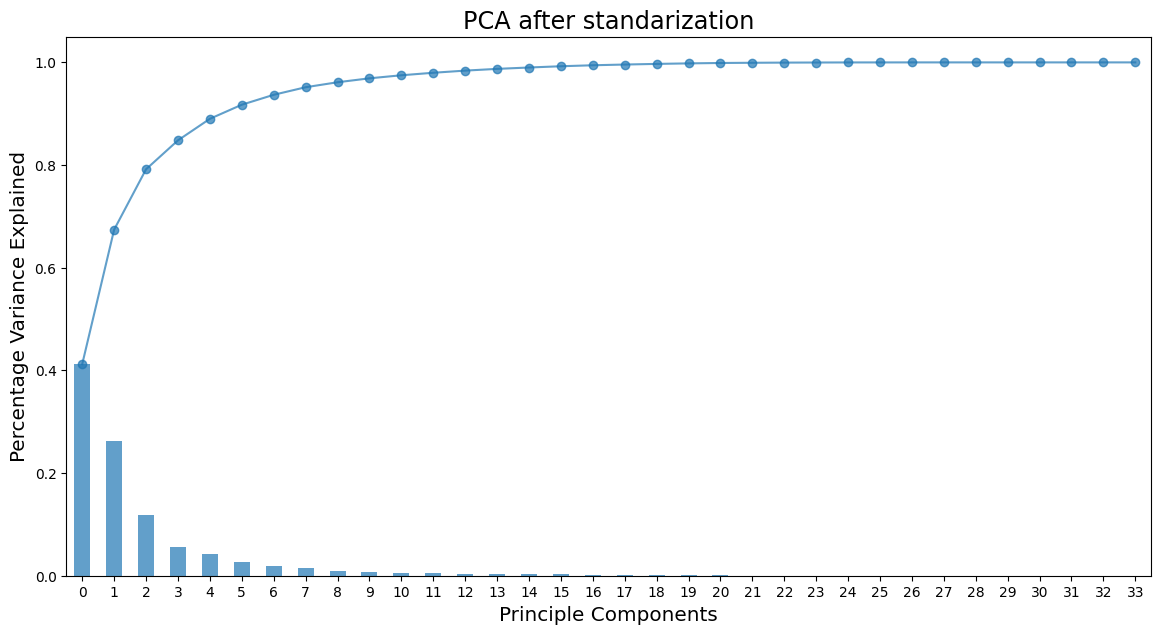

In [62]:
pca = PCA()
pca.fit(standarizes_data)
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("PCA after standarization", fontsize="xx-large")
plt.show();

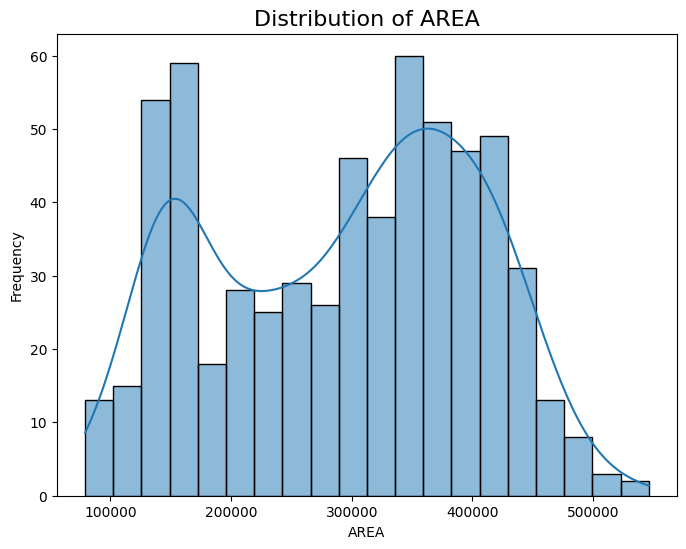

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AREA'], kde=True, bins=20)
plt.title('Distribution of AREA', fontsize=16)
plt.xlabel('AREA')
plt.ylabel('Frequency')
plt.show()

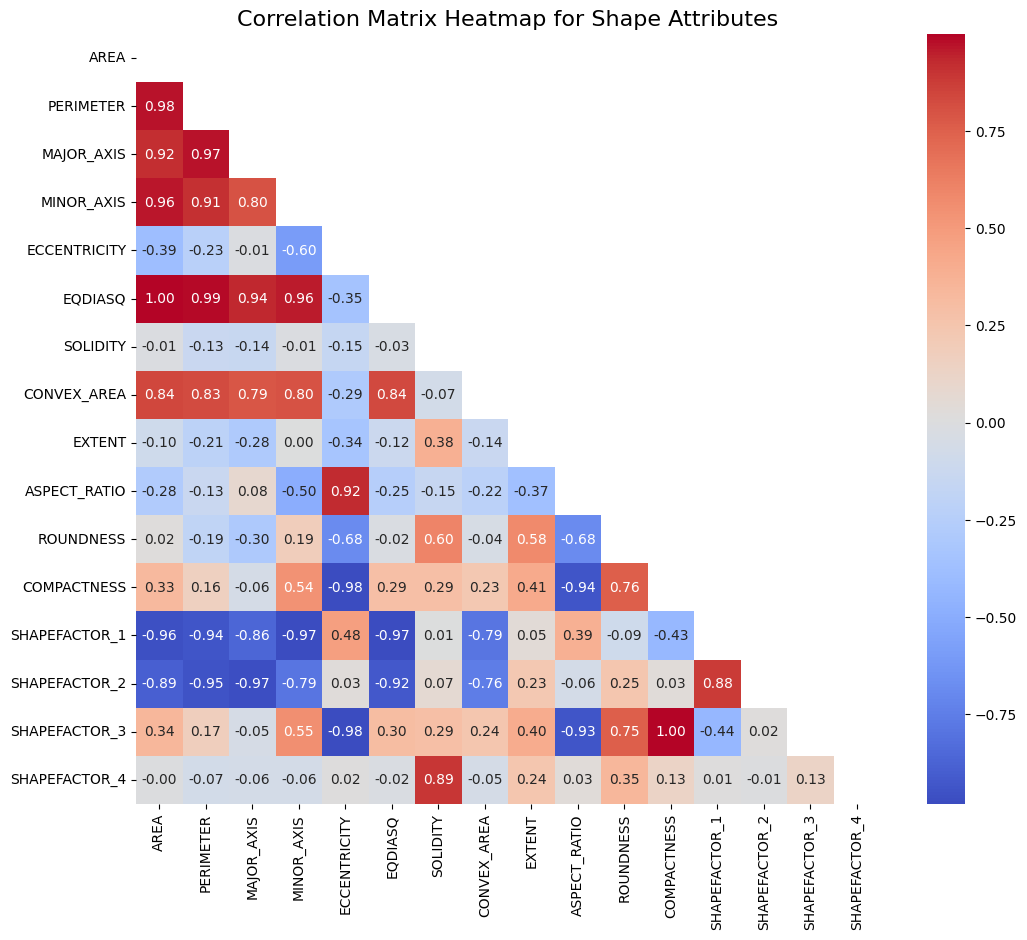

In [64]:
shape_attributes = df[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4']]

corr_matrix_shape = shape_attributes.corr()
mask = np.triu(np.ones_like(corr_matrix_shape, dtype=bool))

plt.figure(figsize=(12, 10))
heatmap_shape = sns.heatmap(corr_matrix_shape, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Shape Attributes', fontsize=16)
plt.show()

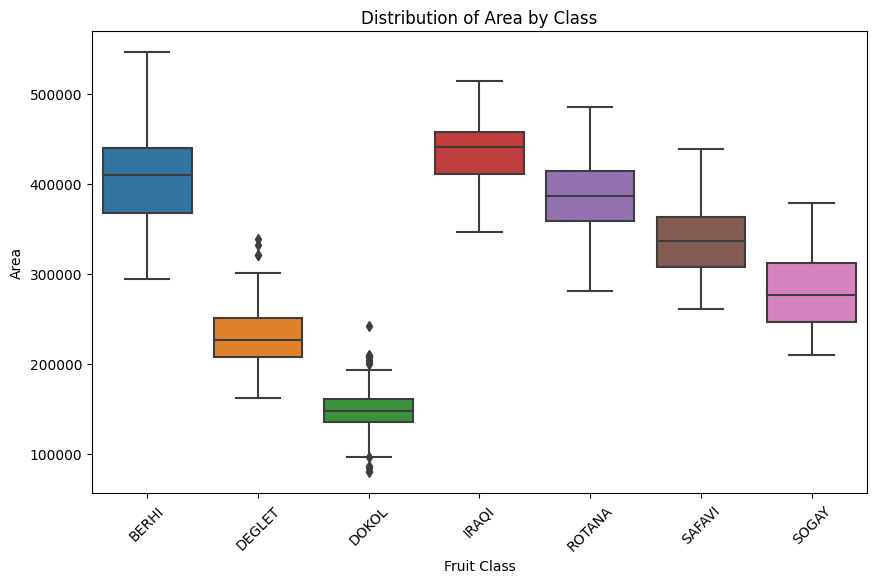

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='AREA', data=df)
plt.title('Distribution of Area by Class')
plt.xlabel('Fruit Class')
plt.ylabel('Area')
plt.xticks(rotation=45)
plt.show()


# Split,Train and Evaluate the models 


Logistic Regression - Accuracy: 0.5463 (+/- 0.0487)
Decision Tree - Accuracy: 0.8407 (+/- 0.0639)
Random Forest - Accuracy: 0.8797 (+/- 0.0280)
k-NN - Accuracy: 0.6634 (+/- 0.0876)
SVM - Accuracy: 0.6081 (+/- 0.0239)


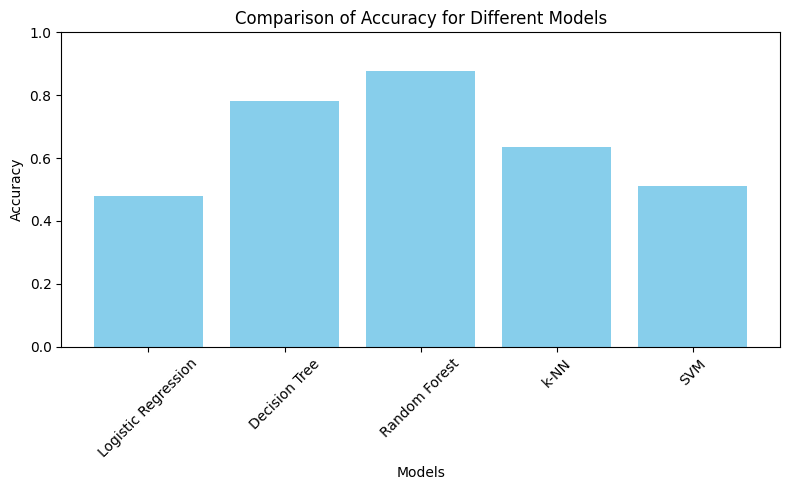

In [66]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('k-NN', KNeighborsClassifier()),
    ('SVM', SVC())
]

# Train and evaluate models
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

    # Perform cross-validation for each model
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f"{name} - Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.title(f'Comparison of Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set appropriate y-axis limits
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Best parameters for Logistic Regression: {'C': 0.1}
Best accuracy for Logistic Regression: 0.5690991548134405

Best parameters for Decision Tree: {'max_depth': None}
Best accuracy for Decision Tree: 0.8312925170068027

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best accuracy for Random Forest: 0.9023912595341168

Best parameters for k-NN: {'n_neighbors': 5}
Best accuracy for k-NN: 0.674685631828489

Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Best accuracy for SVM: 0.5670789527932385



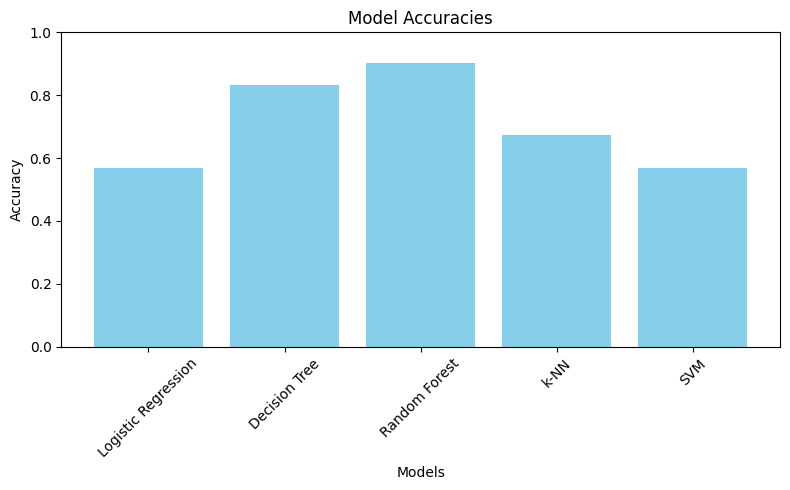

In [67]:

# Define models with their respective parameter grids
from sklearn.model_selection import GridSearchCV

# Define models with their respective parameter grids
models = [
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(max_iter=1000),
        'param_grid': {'C': [0.1, 1]}
    },
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 10]}
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'param_grid': {'n_estimators': [100, 200], 'max_depth': [None, 10]}
    },
    {
        'name': 'k-NN',
        'estimator': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5]}
    },
    {
        'name': 'SVM',
        'estimator': SVC(),
        'param_grid': {'C': [0.1], 'kernel': ['rbf']}
    }
]

# Dictionary to store model accuracies
model_accuracies = {'Model': [], 'Accuracy': []}

# Perform GridSearchCV for each model
for model in models:
    grid_search = GridSearchCV(estimator=model['estimator'], param_grid=model['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    model_name = model['name']
    best_accuracy = grid_search.best_score_
    
    model_accuracies['Model'].append(model_name)
    model_accuracies['Accuracy'].append(best_accuracy)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {best_accuracy}\n")

# Plotting model accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies['Model'], model_accuracies['Accuracy'], color='skyblue')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()